## 📊 Conversion Rate Analysis – Project Summary

### 1. What is the user profile?

Each user/session includes:
- `country`: User location based on IP address  
- `age`: Self-reported at sign-up  
- `new_user`: 1 if the user is new, 0 if returning  
- `source`: Traffic channel (Ads, SEO, Direct)  
- `total_pages_visited`: Proxy for engagement  
- `converted`: Binary target (1 = purchase made)  

---

### 2. What is the association between conversion rate and user profile?

- Users with more page views convert more often  
- Age 30–40 has the highest conversion rate  
- Returning users convert ~5× more than new users  
- Traffic from Ads and SEO converts better than Direct  
- Users from the US and UK have slightly higher conversion  

---

### 3. What are key indicators of high/low conversion?

**Top Predictive Features:**
1. `total_pages_visited` – 0.81
2. `age` – 0.11
3. `new_user` – 0.04
4. `country_US` – 0.01
5. `country_UK` – 0.01

**High Conversion Profile:**
- Returning user  
- ≥5 pages visited  
- Age between 30–40  
- From US/UK  
- Came via Ads or SEO  

**Low Conversion Profile:**
- New user  
- <2 pages visited  
- Came via Direct  
- From lower-conversion countries (e.g., China)  

---

### 4. What does a high-converting user look like?

A returning user aged 30–40 from the US or UK, who came via Ads or SEO and browsed at least 6 pages during the session.

---

### 5. Who should be the target audience for a campaign?

- Returning users who didn’t convert but visited ≥3 pages  
- New users with high engagement  
- Visitors from the US/UK via Ads or SEO  
- 30–40 age group  

> Prioritize these segments for retargeting and personalization.

---

### 6. How do you predict the conversion rate?

- Model: **Random Forest Classifier** (`sklearn`)  
- Preprocessing: One-hot encoding on `source` and `country`  
- Performance:  
  - **Accuracy:** 98%  
  - **AUC Score:** 0.95  
  - **Precision (Class 1):** 0.82  
- Most important feature: `total_pages_visited`

---

### 7. What’s next after making the prediction?

- Retarget high-conversion-probability users  
- Improve product engagement (more page views)  
- Invest more in Ads/SEO, reduce Direct traffic share  
- Design personalized landing pages and offers  


In [1]:
# Step 1: 数据读取与设置
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY")


### EDA Summary: Observations and Insights

#### Dataset Overview
- The dataset consists of **316,200 user sessions**, each with 6 features and no missing values.
- The main outcome variable `converted` indicates whether the user completed a purchase within the session.
- Data types are appropriate: `age`, `new_user`, `total_pages_visited`, and `converted` are numerical; `country` and `source` are categorical.

#### Descriptive Statistics
- The **overall conversion rate** is approximately **3%**, confirming a **severely imbalanced classification problem**.
- The median user age is around 30, with a diverse distribution across countries and traffic sources.

#### New vs Returning Users

- **Returning users** are **over 5× more likely** to convert than new users.
- ➤ *Implication*: Onboarding friction is high. Consider first-time discounts, guided walkthroughs, or trust-building content for new users.

####  Country-Wise Performance
- Users from **US** and **UK** tend to convert at higher rates than users from **China**.
- ➤ *Implication*: Localization and UX optimization for Chinese users could yield ROI.

#### Source Comparison

- Users from **Ads** convert at a significantly higher rate than those from **SEO** or **Direct**.
- ➤ *Implication*: Paid traffic may be higher quality. Consider reallocating budget toward high-performing ad campaigns or optimizing SEO funnel drop-off points.

#### Page Engagement vs Conversion
- Users who convert tend to visit **more pages** per session.
- ➤ *Implication*: Encourage deeper engagement with content—e.g., use recommendation systems, product bundles, or infinite scroll.


In [2]:
print("Dataset Head:")
print(data.head())
print("Data Info:")
print(data.info())

# Descriptive statistics
print("Descriptive Stats:")
print(data.describe())

# Conversion Rate
overall_rate = data['converted'].mean()
print(f"Overall Conversion Rate: {overall_rate:.2%}")

# Conversion Rate by Category
print("Conversion Rate by Country:")
print(data.groupby('country')['converted'].mean())

print("Conversion Rate by Source:")
print(data.groupby('source')['converted'].mean())

print("Conversion Rate by New User:")
print(data.groupby('new_user')['converted'].mean())

Dataset Head:
  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB
None
Descriptive Stats:
      

### Visualization Summary

- **Ads** and **SEO** traffic sources show significantly higher conversion rates than **Direct** traffic.
- **Returning users** (new_user = 0) convert over 5× more than new users.
- **Converted users** tend to view more pages per session, indicating higher engagement.
- **Age distribution** shows a concentration of conversions among users aged **30–40**.

These patterns highlight that conversion is strongly influenced by user engagement, traffic source, and user type.


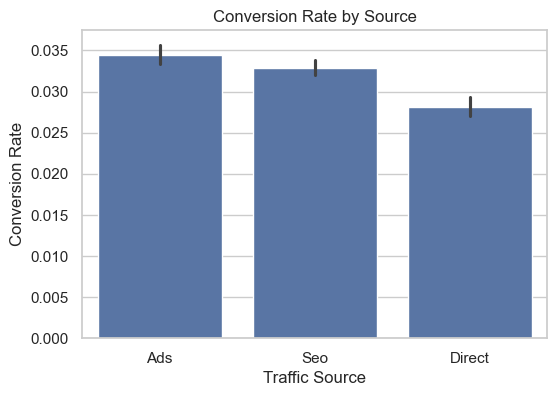

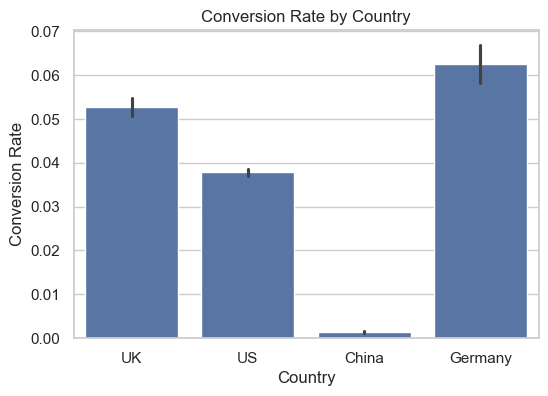

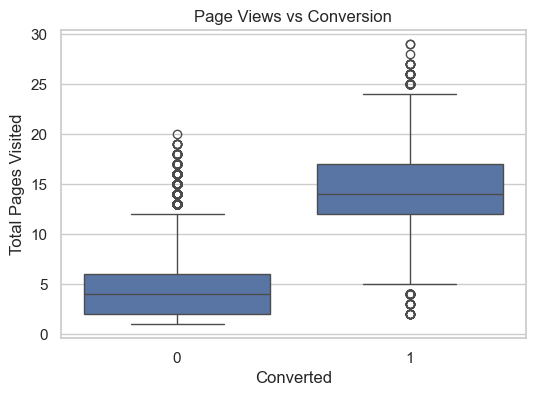

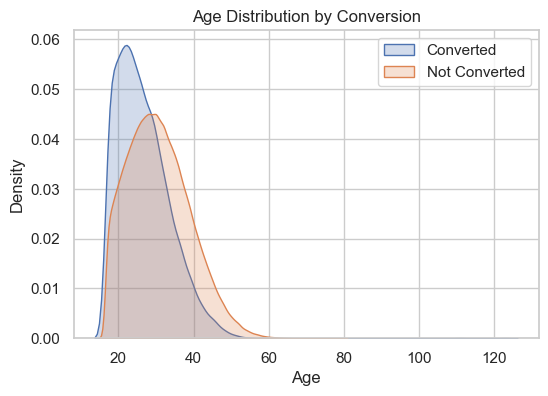

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')

# 1. Conversion Rate by Source
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='converted', data=data)
plt.title('Conversion Rate by Source')
plt.ylabel('Conversion Rate')
plt.xlabel('Traffic Source')
plt.show()

# 2. Conversion Rate by Country
plt.figure(figsize=(6, 4))
sns.barplot(x='country', y='converted', data=data)
plt.title('Conversion Rate by Country')
plt.ylabel('Conversion Rate')
plt.xlabel('Country')
plt.show()

# 3. Page Views vs Conversion (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='converted', y='total_pages_visited', data=data)
plt.title('Page Views vs Conversion')
plt.xlabel('Converted')
plt.ylabel('Total Pages Visited')
plt.show()

# 4. Age Distribution by Conversion (KDE Plot)
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data[data.converted == 1], x='age', label='Converted', fill=True)
sns.kdeplot(data=data[data.converted == 0], x='age', label='Not Converted', fill=True)
plt.title('Age Distribution by Conversion')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()



### Model Evaluation Summary

- **Accuracy**: 98%  
- **AUC Score**: 0.95  
- **Precision (Converted)**: 0.82  
- **Recall (Converted)**: 0.67  
- **F1-score (Converted)**: 0.74  

The model performs well overall, especially in identifying converters with high precision.  
Recall is moderate, suggesting some converters are missed — can be improved via class balancing or threshold tuning.  
Suitable for targeting likely converters in marketing campaigns.

## Top 5 Important Features

1. `total_pages_visited` – 0.81  
2. `age` – 0.11  
3. `new_user` – 0.04  
4. `country_US` – 0.01  
5. `country_UK` – 0.01  

Page views dominate prediction, followed by user age and returning status.


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91848
           1       0.82      0.67      0.74      3012

    accuracy                           0.98     94860
   macro avg       0.90      0.83      0.86     94860
weighted avg       0.98      0.98      0.98     94860

AUC score: 0.9480809270249952
Top 5 important features:
total_pages_visited    0.808053
age                    0.109614
new_user               0.038678
country_US             0.013570
country_UK             0.012753
dtype: float64


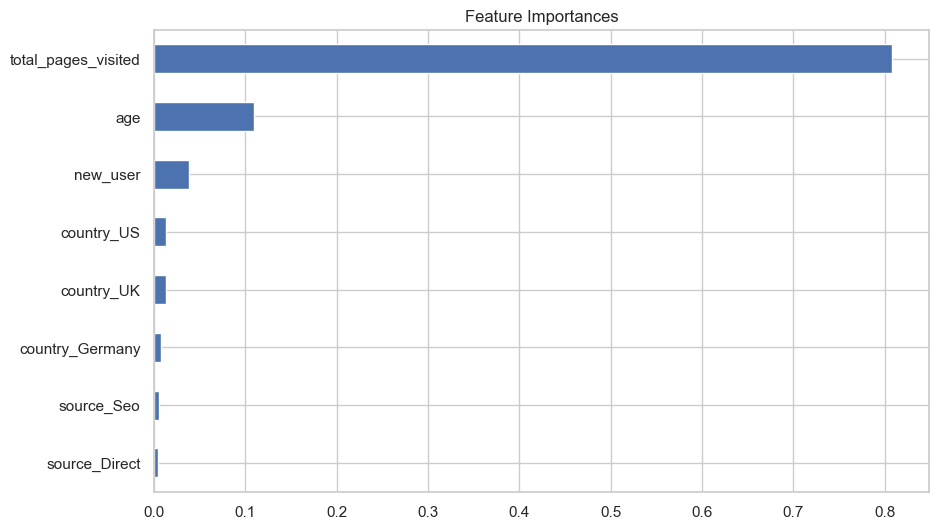

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# One-hot 编码
df = pd.get_dummies(data, columns=['source', 'country'], drop_first=True)

X = df.drop('converted', axis=1)
y = df['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 模型训练
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 评估
print(classification_report(y_test, y_pred))
print("AUC score:", roc_auc_score(y_test, y_prob))

# 计算特征重要性
importances = pd.Series(model.feature_importances_, index=X.columns)

# 按照重要性从大到小排序
importances_sorted = importances.sort_values(ascending=False)

# 打印前5个最重要的特征
print("Top 5 important features:")
print(importances_sorted.head())

# 绘图（你也可以只画前10个）
importances_sorted.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # 让重要性高的显示在上面
plt.show()
